<b>Importing the Libraries</b>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


<b> Loading the dataset using pandas</b>

In [2]:
%%time
df = pd.read_csv('D:/Subhradeep/Dataset/DC/Crop.csv')

Wall time: 3.99 ms


In [3]:
df.shape

(1000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
id                  1000 non-null int64
water               958 non-null float64
uv                  949 non-null float64
area                1000 non-null float64
fertilizer_usage    1000 non-null int64
yield               1000 non-null float64
pesticides          1000 non-null float64
region              1000 non-null int64
categories          1000 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


<b>Initial Analysis:</b> 

In order to understand the data we need to look closely at each variable and understand their meaning and relevance to the problem. We will look at the following information amd the way in which we will proceed with our analysis.

<b>Feature Variable:</b> Name of the features/variable in the dataset. 

<b>Type:</b> As per the information retrieved from the above, there are two types: Numerical(int,float) and categorical(categories, going by the name of the features).

<b>Ingridient:</b> Identification of the variable parts- the fertilizer, pesticides and water is important for  the production of the crop. When we say fertilizer_usage it describes the proportion of fertilizer being used.

<b>Target feature/Expected:</b> Based on 'Yield' and 'Area' we will calculate Productivity, which will be our expected variable.

<b>Comments :</b> 
While we will concentrate on the Target value/feature. We will keep in mind with the following questions as we proceed with our analysis:

a. Do the mentioned variables are used during cultivation?

b. How important is the variable if used and not used during cultivation? For example, water is important for cultivation so this feature is very important.

c. Is the information being provided in the feature variable?



<b>Technical Assesment:</b> 

As per the technical assessment document we have the following information for each of the variable:

● Id - Identifier

● Water - the average amount of water received by hectare

● UV - the average amount of light received by hectare

● Area - the size of the farm in hectares

● Fertilizer_usage - the level of fertilization

● Yield - total crop yield by farm

● Pesticides - the amount of pesticides used per hectare

● Region - region code

● Pesticides Used - comma-separated list of pesticides used

<b>Note:</b> Pesticides Used is the categories column is the kind of pesticides being used.




So we will now proceed with checking the data so as to analyze further !











In [5]:
# Top 5 data of the dataset using the pandas head method. 
# We can similarly use the tail to see the bottom of the data.

df.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


    We also have few null/emplty values for UV and Water. We need to take care going forward.

In [6]:
#Renaming columns and deriving the target variable Productivity using Yield and Area variable.

df.rename(columns={'id':'Id'
                        ,'water':'Water'
                        ,'uv':'UV'
                        ,'area':'Area'
                        ,'fertilizer_usage':'Fertilizer_Usage'
                        ,'yield':'Yield'
                        ,'pesticides':'Pesticides'
                        ,'region':'Region'
                        ,'categories':'Pesticides_Used'                
                        },inplace=True)

df['Productivity'] = df['Yield']/df['Area']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Id                  1000 non-null int64
Water               958 non-null float64
UV                  949 non-null float64
Area                1000 non-null float64
Fertilizer_Usage    1000 non-null int64
Yield               1000 non-null float64
Pesticides          1000 non-null float64
Region              1000 non-null int64
Pesticides_Used     1000 non-null object
Productivity        1000 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 78.2+ KB


First thing first, we will see our target variable which is Productivity with a descriptive summary statistics using the describe command of pandas.





In [8]:
#Summary statistics for productivity
df['Productivity'].describe()

count    1000.000000
mean        7.588364
std         2.738814
min         1.336070
25%         5.542781
50%         7.431937
75%         9.585453
max        14.232703
Name: Productivity, dtype: float64

So we have values more than 0 which is good . We will now check for distribution of the target data using seaborn distribution plot.


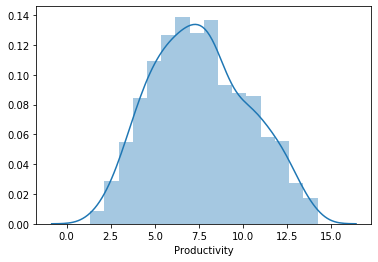

In [9]:
sns.distplot(df['Productivity'])

Data almost looks like symetrical, lets check further with the skewness and kurtosis

In [10]:
#Skewness and Kurt
print('Skewness of Productivity: %f' % df['Productivity'].skew())
print('Kurtosis of Productivity: %f' % df['Productivity'].kurt())

Skewness of Productivity: 0.197938
Kurtosis of Productivity: -0.661452


So the data is 'almost' symetric. 

Let's check for the unique values for each columns  and will try to derive information from it in the later phase of the kernel.

In [11]:
for value in df:
    print('Column {} {} unique values present'.format(value,df[value].nunique()))

Column Id 1000 unique values present
Column Water 918 unique values present
Column UV 939 unique values present
Column Area 949 unique values present
Column Fertilizer_Usage 6 unique values present
Column Yield 993 unique values present
Column Pesticides 924 unique values present
Column Region 7 unique values present
Column Pesticides_Used 62 unique values present
Column Productivity 1000 unique values present


<b>Region:</b> Region consists of 7 unique values, so we will create 6 dummy variable in order to avoid Dummy trap.

<b>Pesticides_Used :</b> It consists of 4 values so we will create 4 dummy variable

<b>Missing Values:</b> 

From the above statistical information which we found earlier that we have few null values. We will see the percentage of missing values present and then will take the necessary action.



In [12]:
print('The percentage of null value in Water is:',round((df['Water'].isnull().sum()*100)/len(df),2))
print('The percentage of null value in UV is:',round((df['UV'].isnull().sum()*100)/len(df),2))



The percentage of null value in Water is: 4.2
The percentage of null value in UV is: 5.1


<b>Observation:</b> 

As per the percentage of null value, it is a small percentage of null value. So we have 3 approach to consider for handling the missing data.

<b>Approach 1 :</b> We can drop the missing data using  dropna. This is simple and easy to use. However, there are implications to it. Here we have a dataset of 1k which is less, and dropping of data can lead to important information loss in our dataset.

<b>Approach 2:</b> We can use Imputation. We will impute the value with mean/median/mode and can handle the null values. This is the most frequently used method.

<b>Approach 3:</b> Prediction Model, We can create a prediction model and can predict the missing values. This is not feasible here since the missing data is very less.

We will proceed with the <b>Approach 2</b>.

In [13]:
df['Water'] = df['Water'].fillna((df['Water'].median()))
df['UV'] = df['UV'].fillna((df['UV'].median()))

In [14]:
df.head()

,Id,Water,UV,Area,Fertilizer_Usage,Yield,Pesticides,Region,Pesticides_Used,Productivity
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c",2.469659
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d",2.533752
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a",8.037360
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d,10.034322
4,10,7.969,73.689,5.407,1,29.140,0.274,0,"c,d",5.389310


<b>Outliers:</b>

We have taken care of the null value present in the Water and UV field. So we will check now if there are outliers present and will handle them.



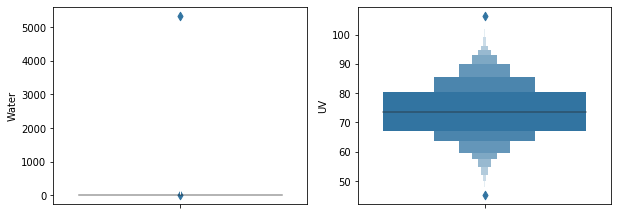

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221)
sns.boxenplot(df['Water'],orient='v')

ax = fig.add_subplot(222)
sns.boxenplot(df['UV'],orient='v')

plt.show()



Clearly we have Outlier in the Water variable and we will proceed to remove it.

We will try to focus more on extreme outliers since we dont want to lose more information which will cause our model to have lower accuracy.

We determine the threshold by multiplying 1.5 with the <b>IQR</b>(Interquantile range). 

In [16]:
# Removing Outlier from Water.
water_out = df['Water']
q25, q75 = np.percentile(water_out, 25), np.percentile(water_out, 75)
print('25 Quartile value is: {} and 75 quartile value is: {}'.format(q25, q75))
water_iqr = q75 - q25
print('IQR is: {}'.format(water_iqr))

water_cutoff = water_iqr * 1.5
water_lower, water_upper = q25 - water_cutoff, q75 + water_cutoff
print('Cut Off Value is: {}'.format(water_cutoff))
print('Water Lower Value is: {}'.format(water_lower))
print('Water Upper Value is: {}'.format(water_upper))

outliers = [x for x in water_out if x < water_lower or x > water_upper]
print('Number of outliers for Water Outliers for the dataset have: {}'.format(len(outliers)))
print('Value of Water outliers are:{}'.format(outliers))

df = df.drop(df[(df['Water'] > water_upper) | (df['Water'] < water_lower)].index)
print('')
print('Outliers Removal Successful from the dataset')


25 Quartile value is: 4.695499999999999 and 75 quartile value is: 8.610999999999999
IQR is: 3.9154999999999998
Cut Off Value is: 5.87325
Water Lower Value is: -1.1777500000000005
Water Upper Value is: 14.48425
Number of outliers for Water Outliers for the dataset have: 2
Value of Water outliers are:[5340.0, 15.214]

Outliers Removal Successful from the dataset



Box plot after removal of outlier



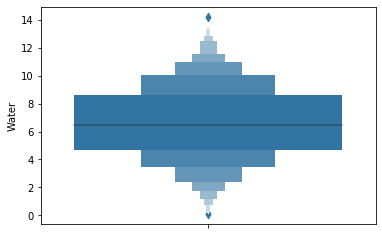

In [17]:
print('')
print('Box plot after removal of outlier')
print('')
plt.plot(figsize=(16,8))
sns.boxenplot(df['Water'],orient='v')
plt.show()

<b>Handling Categorical Columns:</b>

    We will create dummy variable for handling the categorical column Pesticides_Used and Region as mentioned in the above.

In [18]:

pesticides_cat = df['Pesticides_Used'].str.get_dummies(sep=',')
region_cat = pd.get_dummies(df['Region'],prefix='Region',drop_first=True)
df = pd.concat([df,pesticides_cat,region_cat],axis=1)

# For future analysis on the Yield field we will create a new dataframe 
#so that we don't need to go through the entire process again.

df_new = df 


In [19]:

df = df.drop(columns=['Region','Pesticides_Used','Yield','Area','Id'])


<b>Finding Co relation:</b>

    In this step we try to find the co relation of each feature variable with the target. The values which we will take into consideration will be Water,UV,Fertilizer,Pesticides and Productivity.


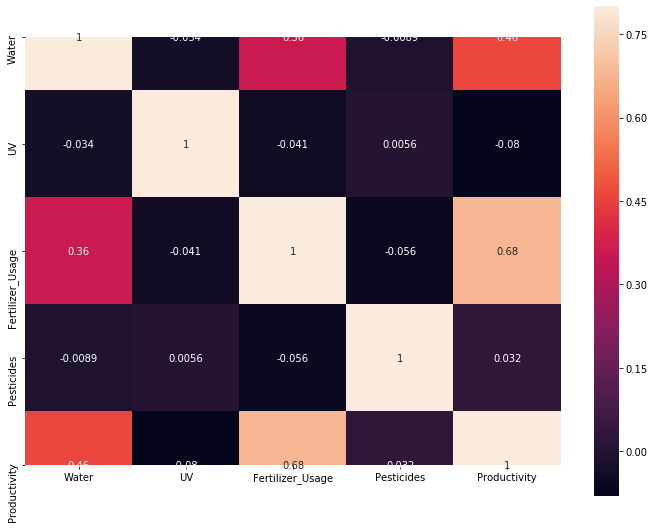

In [20]:
#correlation matrix
var = ['Water','UV','Fertilizer_Usage','Pesticides','Productivity']
corrmat = df[var].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

<b>Visulaization</b>

    We will use the seaborn pairplot for visualization of the variable. We will check all the variable in terms of Productivity which is our derived/target variable.

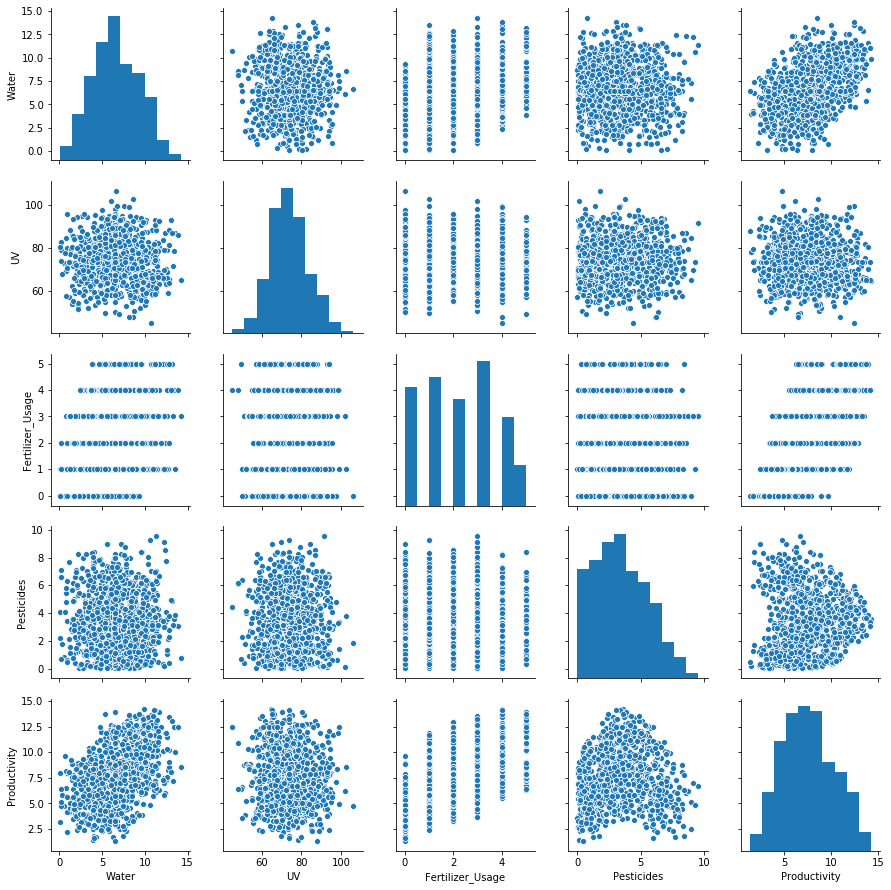

In [21]:
sns.pairplot(df,vars=var)
plt.show()

<b>Observation</b> as per the co relation and Pair plot in respect to Productivity v/s feature variable is as follows:

    Water and Fertiliser_Usage have linear relationship.
    UV has negative relationship or no relationship with the feature variables.
    Categories and Region has not been considered since they are categorical and has been converted into dummy variables.
    
    

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables with Multicollinearity')]

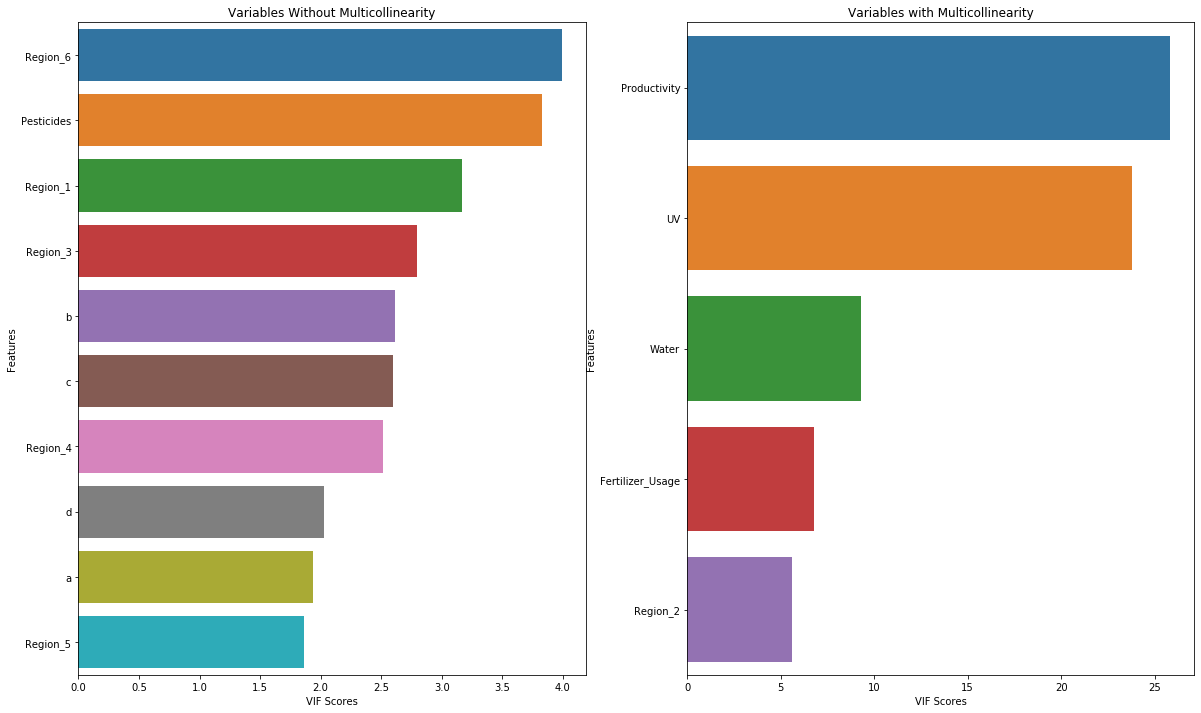

In [22]:
def vif_calculate(X):
    variables = list(df.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(df.columns))}
    return vif


numericalCol = []
for f in df.columns:
    
    if df[f].dtype!='object':
        numericalCol.append(f)
mergedFilterd = df[numericalCol]
vifDict = vif_calculate(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,12)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1)
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2)
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables with Multicollinearity")


Below are the measures to interpret the VIF scores from the above plot:

VIF = 1 --> <b>Not correlated</b>

1 < VIF < 5--> <b>Moderately correlated</b>

VIF >=5--> <b>Highly correlated</b>






<b>Normalizing the dataset:</b>

    Before splitting the dataset into train and test. We will normalize both the X(independent) and y(dependent).We will scale between 0 and 1. We will use the sklearn.preprocessing.MinMaxScaler to perform the operation for independent and for the dependent we will divide them from the maximum. 
    Once the normalizing of the data is completed, we will split the data for fitting the model.

In [23]:
y = df.iloc[:,4]
y_max = np.max(y)
y = y/y_max
df_temp = df.drop(columns=['Productivity'])
X = df_temp.iloc[:,0:].values
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
del df_temp

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

<b>Model with KFold Cross Validation :</b>

    Now we have dataset divided into training and test dataset. Now we will create a function which will define a generic model so that we can reuse the function code. I will check without removing any feature and then predicting how it is for the baseline model and then will proceed with PCA(Dimensionality Reduction Technique).

,R Square Score
Linear Regression,0.680417
Random Forest,0.827067
SVM RBF,0.718009
SVM Linear Kernel,0.676052


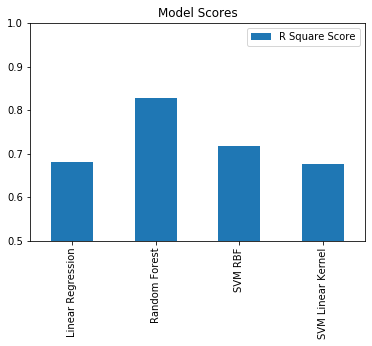

In [24]:
def model(x,y):
    results={}
    def test_model(regr):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(regr, x, y, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    regr = linear_model.LinearRegression()
    results['Linear Regression']=test_model(regr)   
    
    regr = RandomForestRegressor()
    results['Random Forest']=test_model(regr)   
    
    regr = svm.SVR()
    results['SVM RBF']=test_model(regr)
    
    regr = svm.SVR(kernel='linear')
    results['SVM Linear Kernel']=test_model(regr)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=['R Square Score'] 
    results.plot(kind='bar',title='Model Scores')
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

model(X_train,y_train)


<b>Feature Reduction:</b> Using PCA and applying cross validation

    There are many features, so I am going to use PCA to reduce them. The idea is to start with n_components = number of columns. Then select the number of components that add up to 1 variance_ratio.

In [25]:
X = df
y = X['Productivity']
X = X.drop('Productivity',1)

pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.85383208, 0.9268774 , 0.9666469 , 0.98424522, 0.98676085,
       0.98926405, 0.99158895, 0.99369545, 0.99554037, 0.99712468,
       0.99833277, 0.99933344, 0.99991804, 1.        ])

In [26]:

pca = PCA(n_components=13,whiten=True)
pca = pca.fit(X)
dataPCA = pca.transform(X)

#Scaling the data 
y_max = np.max(y)
y = y/y_max
X = dataPCA[0:]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#Splitting the transformed dataset into training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)


,R Square Score
Linear Regression,0.676321
Random Forest,0.763839
SVM RBF,0.716350
SVM Linear Kernel,0.674873


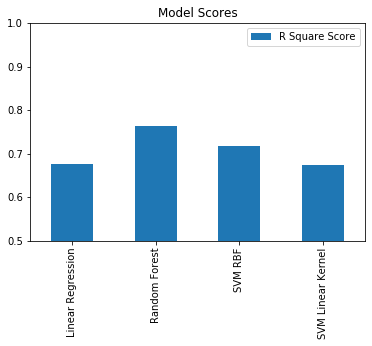

In [27]:
model(X_train,y_train)

<b>Model with no derived feature:</b>

    We will try to predict the Target variable as Yield and would like to find how the model performs without the derived feature. I have performed the same steps which was performed in the previous section. I will use the df_new which was earlier created so that we can check for a model with Yield as the target feature.  

In [28]:
df_new = df_new.drop(columns=['Id','Region','Pesticides_Used','Productivity'])

In [29]:
X = df_new
y = X['Yield']
X = X.drop('Yield',1)

pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.80136389, 0.88125423, 0.93219808, 0.9693533 , 0.98558765,
       0.98793941, 0.99022902, 0.9923018 , 0.99422026, 0.99594962,
       0.9973815 , 0.99851133, 0.99937891, 0.99992461, 1.        ])

,R Square Score
Linear Regression,0.712487
Random Forest,0.684412
SVM RBF,0.729670
SVM Linear Kernel,0.706660


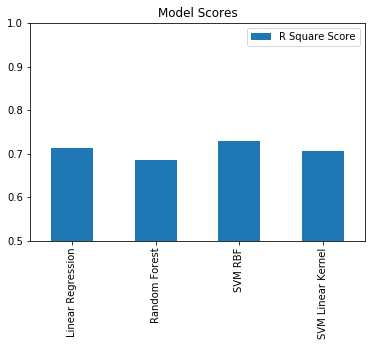

In [30]:
pca = PCA(n_components=14,whiten=True)
pca = pca.fit(X)
dataPCA = pca.transform(X)


#Scaling the data 

y_max = np.max(y)
y = y/y_max
X = dataPCA[0:]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#Splitting the transformed dataset into training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

model(X_train,y_train)

<b>Summary:</b> 
    
    a. The dataset contained few null values in Water and the UV field. I have imputed the null values with median values.
    b. Water field contained outliers which was removed.
    c. One of the field was renamed from categories to Pesticides_used so that it can correctly interpreted.
    c. Target variable is calculated as Productivity = Yield/Area.
    d. There were two fields(Region and pesticides_used) which was identified as categorical. This been converted to dummy     variable.
    e. Manual finding of co relation of variables was being performed through heat map. It was found that UV field has no relation with Productivity.
    f. Water and Fertilizer_Usage has linear relationship with productivity
    g. Features were normalized using MinMax scaler such that it is in given range between 0 and 1.
    h. Without feature reduction, random forest tends to be a good model with 83% accuracy in comparison to other regression model.
    i. I used PCA for dimensionality reduction technique. The idea is to start with n_components = number of columns. Then select the number of components that add up to 1 variance_ratio.  Random forest tends to perform with 74% of accuracy in comparison to the other regression model.
    j. I also predicted the model without deriving our target feature variable, i.e to predict the Yield. This has not predicted the linear relationship between the independent and dependent variables.
    
    
<b>Conclusion:</b>

In this model different methods of algorithm were used to predict the Productivity of the crop for a farm based model. The notebook also tried to show which features has strong co relation and least corelation using multi collinearity.  
    